<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Welcome!</title>
    <style>
        body {
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            background: linear-gradient(135deg, #ff7eb3, #ff758c, #ff7eb3);
            color: white;
            font-family: 'Poppins', sans-serif;
            text-align: center;
            overflow: hidden;
        }
        .container {
            background: rgba(0, 0, 0, 0.4);
            padding: 30px;
            border-radius: 15px;
            box-shadow: 0 10px 20px rgba(0, 0, 0, 0.3);
            animation: popUp 1s ease-in-out;
        }
        h1 {
            font-size: 3rem;
            font-weight: bold;
            animation: fadeIn 2s ease-in-out;
        }
        p {
            font-size: 1.4rem;
            margin-top: 10px;
            opacity: 0.8;
        }
        @keyframes fadeIn {
            from { opacity: 0; transform: translateY(-20px); }
            to { opacity: 1; transform: translateY(0); }
        }
        @keyframes popUp {
            from { transform: scale(0.8); opacity: 0; }
            to { transform: scale(1); opacity: 1; }
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>🌟 Welcome to My Jupyter Notebook! 🌟</h1>
         <p>Discover insights, uncover trends.</p>
    </div>
</body>
</html>



<div style="
    border: 3px solid #28a745; 
    border-radius: 10px; 
    padding: 20px; 
    text-align: center; 
    background-color: #f0fdf4; 
    box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.2);
">
    <h1 style="
        color: #28a745; 
        font-family: 'Arial', sans-serif;
        font-size: 36px;
        font-weight: bold;
        letter-spacing: 2px;
        text-transform: uppercase;
    ">
        📚 Import Libraries ⚙️
    </h1>
</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

<div style="
    border: 3px solid #007bff; 
    border-radius: 10px; 
    padding: 20px; 
    text-align: center; 
    background-color: #f8f9fa; 
    box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.2);
">
    <h1 style="
        color: #007bff; 
        font-family: 'Arial', sans-serif;
        font-size: 36px;
        font-weight: bold;
        letter-spacing: 2px;
        text-transform: uppercase;
    ">
        🚀 Read & Explore the Data 📊
    </h1>
</div>



In [2]:
Base_DIR = os.path.dirname(os.path.abspath(os.getcwd()))
Data_DIR = os.path.join(Base_DIR, 'Data')
df = pd.read_csv(Data_DIR + '/ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [25]:
df["Air temperature [K]"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Air temperature [K]
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


In [4]:
df.isna().sum() 

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.00,0.0,0.00,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.00,0.0,0.00,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.00,0.0,0.00,1.0


In [6]:
df.drop(columns=['UDI', 'Product ID'], inplace=True)

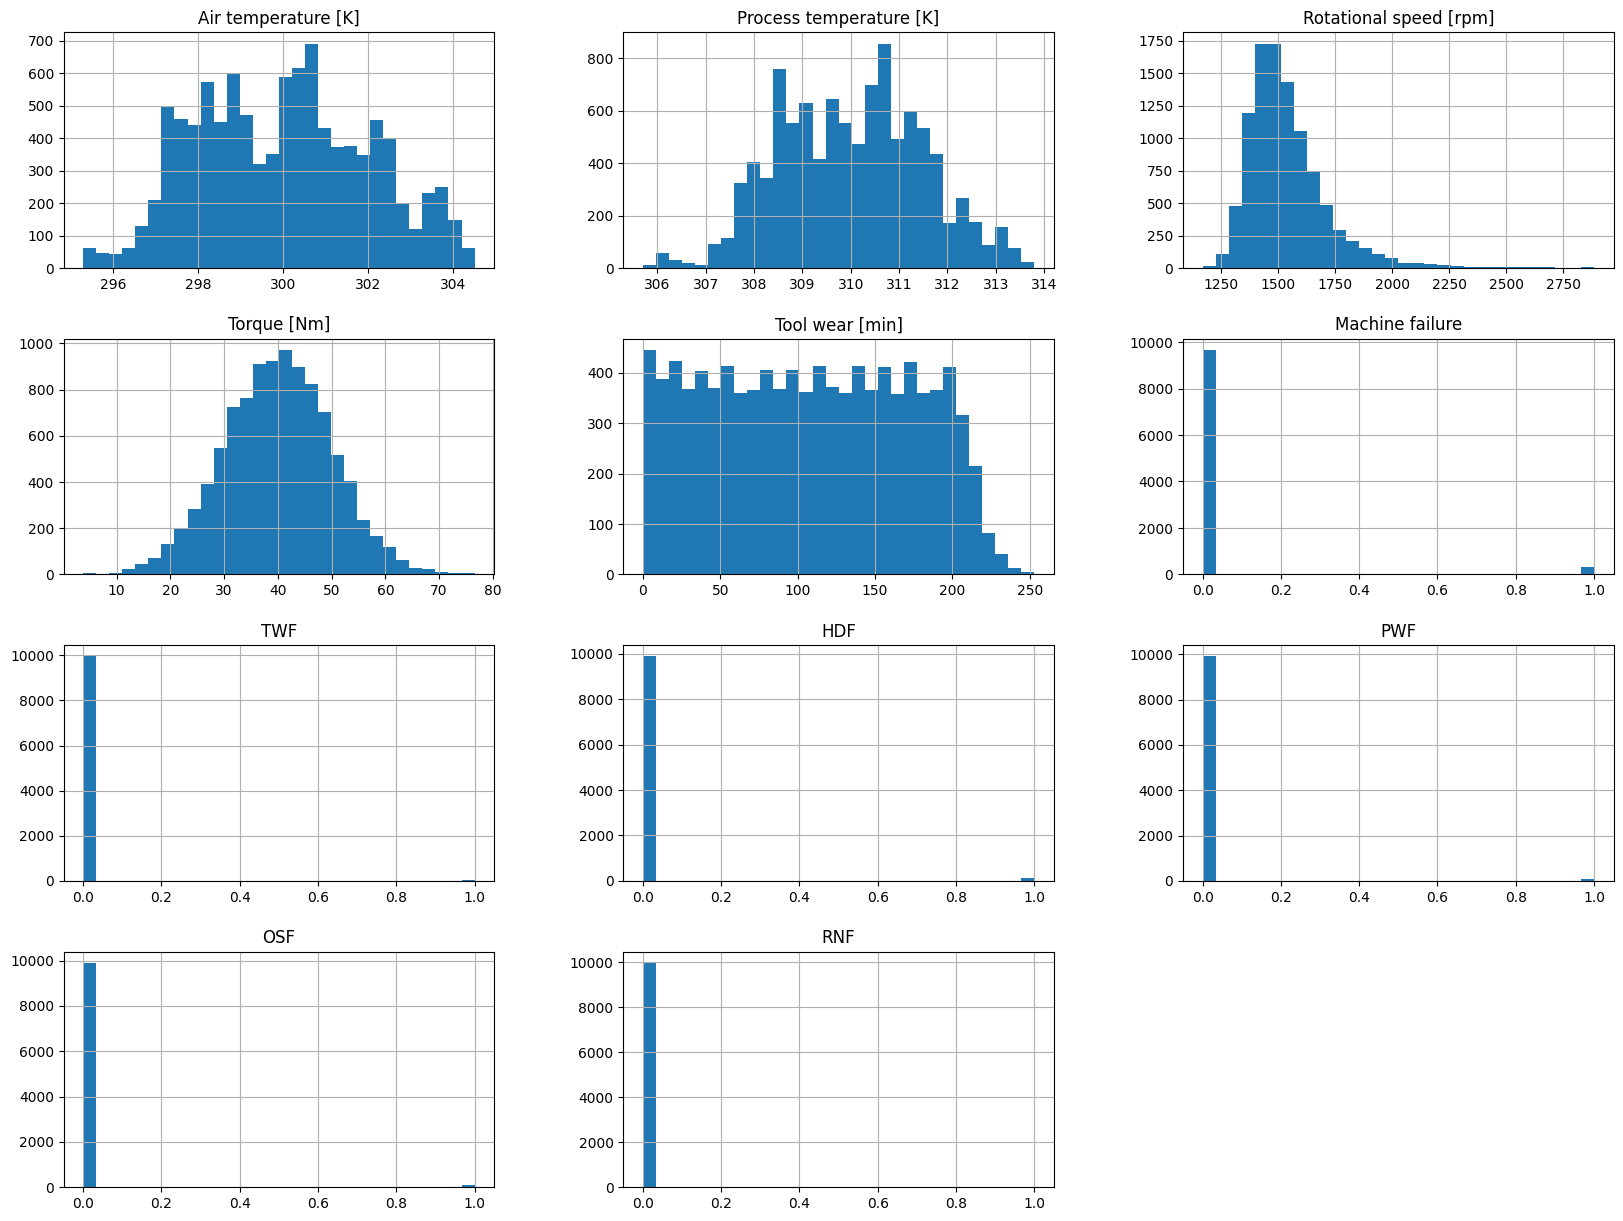

In [7]:
df.hist(figsize=(20, 15), bins=30)
plt.show()

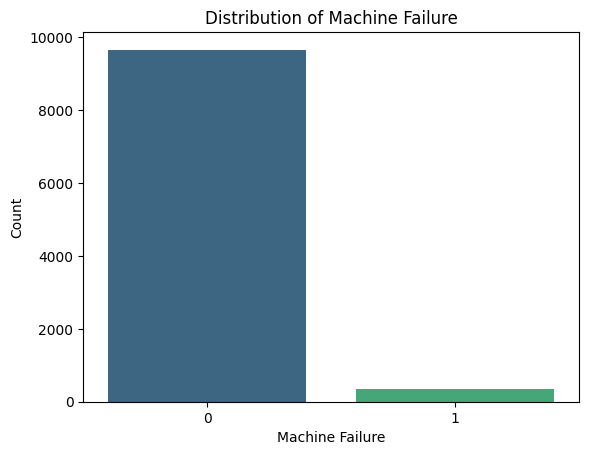

In [8]:
sns.countplot(x='Machine failure', data=df, palette='viridis')
plt.title('Distribution of Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Count')
plt.show()

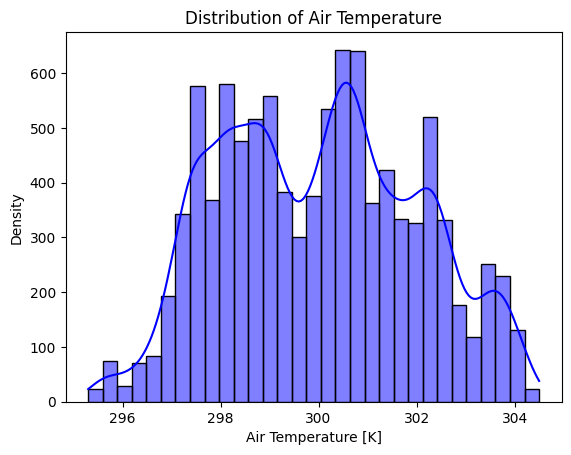

In [9]:
sns.histplot(df['Air temperature [K]'], kde=True, color='blue')
plt.title('Distribution of Air Temperature')
plt.xlabel('Air Temperature [K]')
plt.ylabel('Density')
plt.show()

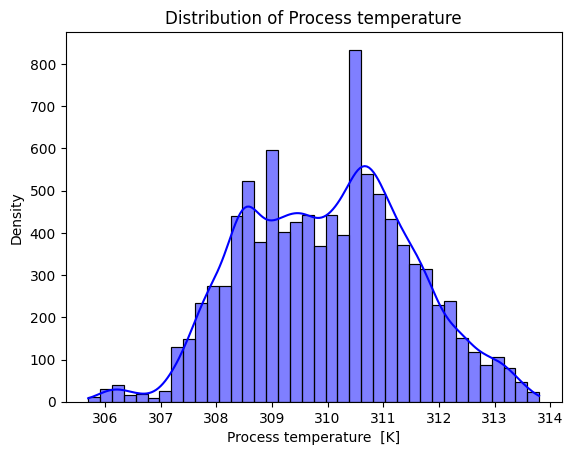

In [10]:
sns.histplot(df["Process temperature [K]"], kde=True, color='blue')
plt.title('Distribution of Process temperature')
plt.xlabel('Process temperature  [K]')
plt.ylabel('Density')
plt.show()

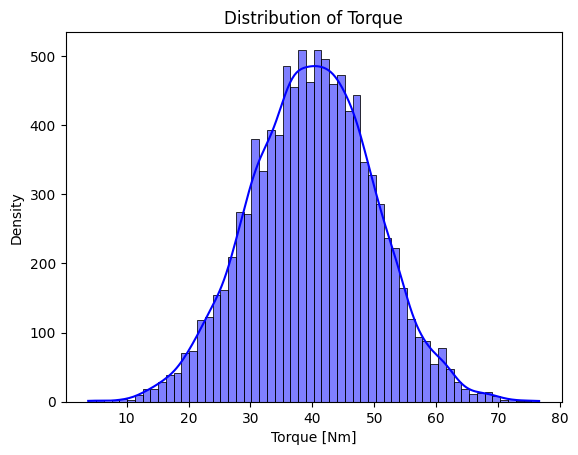

In [11]:
sns.histplot(df["Torque [Nm]"], kde=True, color='blue')
plt.title('Distribution of Torque')
plt.xlabel('Torque [Nm]')
plt.ylabel('Density')
plt.show()

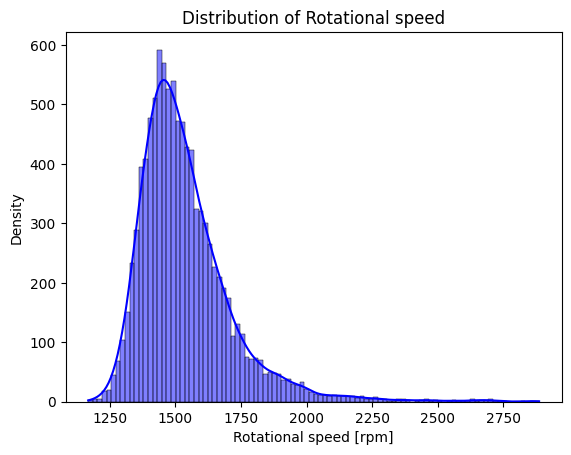

In [12]:
sns.histplot(df["Rotational speed [rpm]"], kde=True, color='blue')
plt.title('Distribution of Rotational speed')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Density')
plt.show()

In [13]:
df["RNF"].value_counts()

RNF
0    9981
1      19
Name: count, dtype: int64

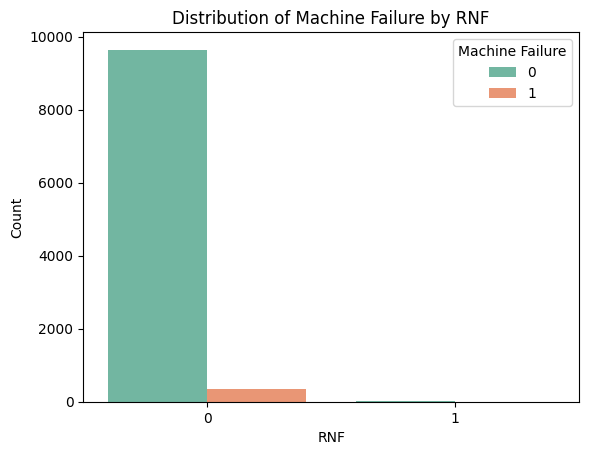

In [14]:
sns.countplot(x='RNF', data=df, palette='Set2', hue='Machine failure')
plt.title('Distribution of Machine Failure by RNF')
plt.xlabel('RNF')
plt.ylabel('Count')
plt.legend(title='Machine Failure', loc='upper right')
plt.show()

HDF
0    9885
1     115
Name: count, dtype: int64


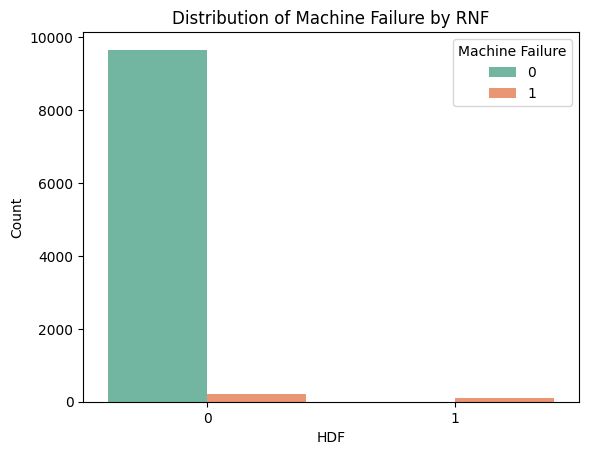

In [15]:
print(df["HDF"].value_counts())
sns.countplot(x='HDF', data=df, palette='Set2', hue='Machine failure')
plt.title('Distribution of Machine Failure by RNF')
plt.xlabel('HDF')
plt.ylabel('Count')
plt.legend(title='Machine Failure', loc='upper right')
plt.show()

PWF
0    9905
1      95
Name: count, dtype: int64


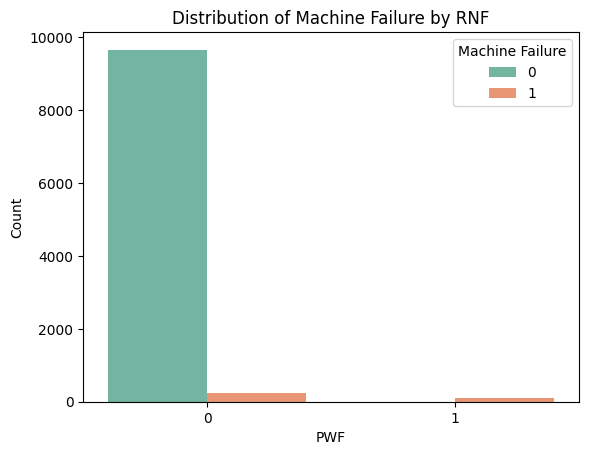

In [16]:
print(df["PWF"].value_counts())
sns.countplot(x='PWF', data=df, palette='Set2', hue='Machine failure')
plt.title('Distribution of Machine Failure by RNF')
plt.xlabel('PWF')
plt.ylabel('Count')
plt.legend(title='Machine Failure', loc='upper right')
plt.show()

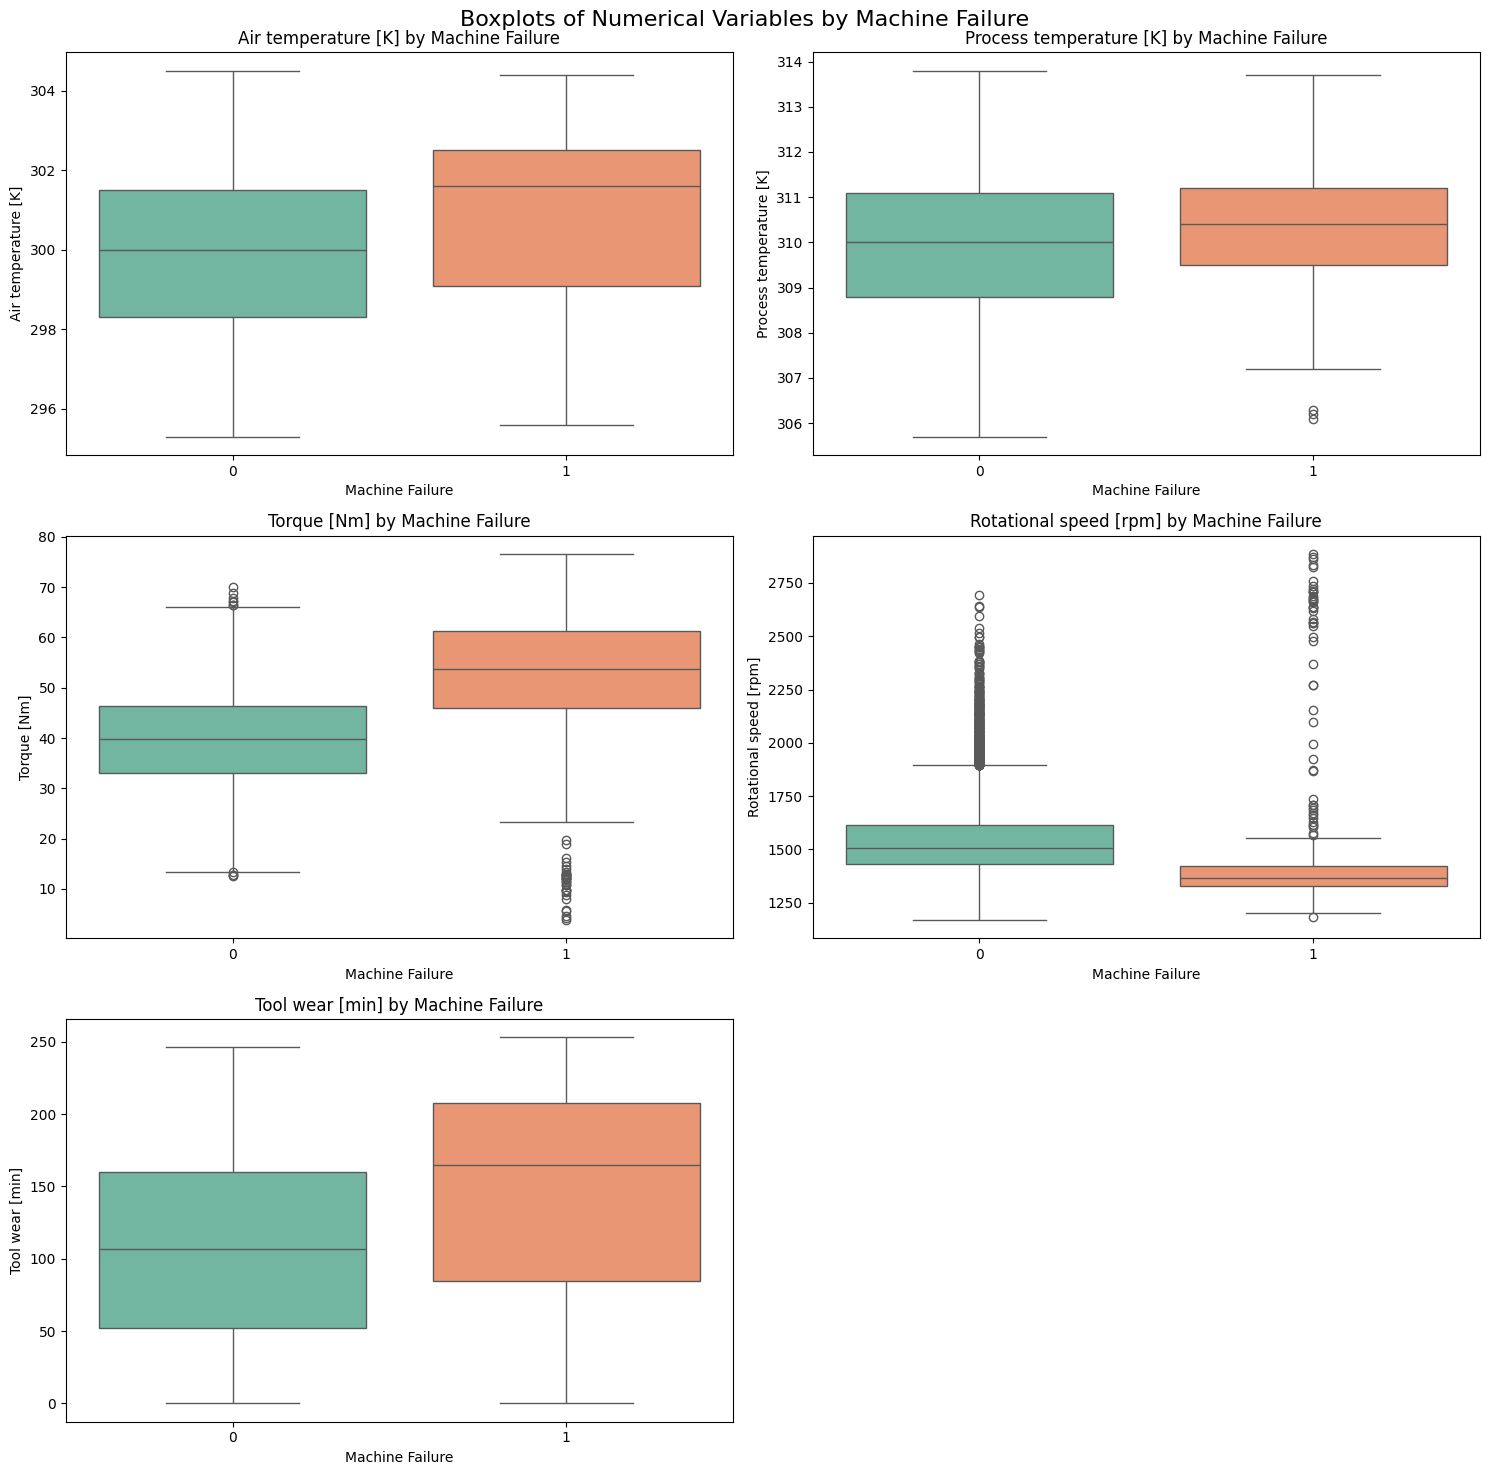

In [17]:
num_cols = ['Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]',
            'Rotational speed [rpm]', "Tool wear [min]"]

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Boxplots of Numerical Variables by Machine Failure', fontsize=16)

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x='Machine failure', y=col, data=df, palette='Set2', ax=axes[i])
    axes[i].set_title(f'{col} by Machine Failure')
    axes[i].set_xlabel('Machine Failure')
    axes[i].set_ylabel(col)

for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


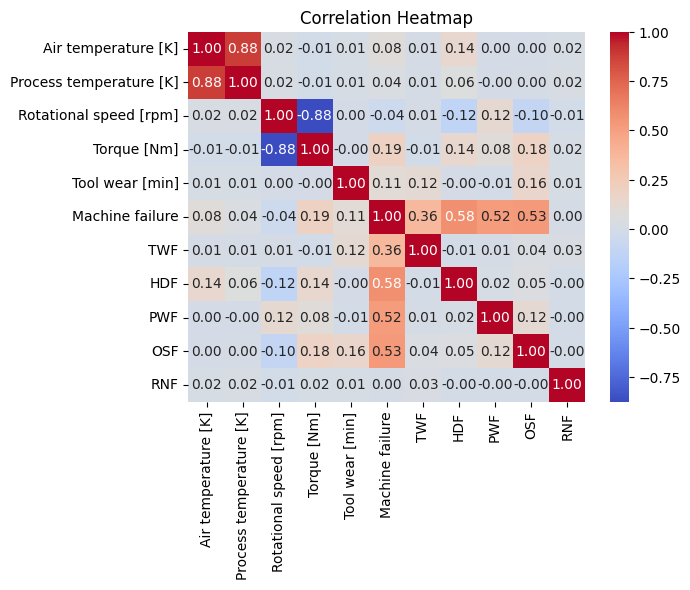

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<div style="
    border: 3px solid #007bff; 
    border-radius: 10px; 
    padding: 20px; 
    text-align: center; 
    background-color: #f8f9fa; 
    box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.2);
">
    <h1 style="
        color: #007bff; 
        font-family: 'Arial', sans-serif;
        font-size: 36px;
        font-weight: bold;
        letter-spacing: 2px;
        text-transform: uppercase;
    ">
        🚀Split Data & Prepare it for the model 📊
    </h1>
</div>



In [ ]:
X = df.drop(columns=['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
y = df['Machine failure']
def add_engineered_features(X):
    X = X.copy()
    X['temp_diff'] = X['Process temperature [K]'] - X['Air temperature [K]']
    X['temp_ratio'] = X['Process temperature [K]'] / X['Air temperature [K]']
    X['torque_to_speed_ratio'] = X['Torque [Nm]'] / X['Rotational speed [rpm]']
    X['power_approx'] = X['Torque [Nm]'] * X['Rotational speed [rpm]'] * 0.10472
    X['high_torque_flag'] = (X['Torque [Nm]'] > 50).astype(int)
    X['low_speed_flag'] = (X['Rotational speed [rpm]'] < 1500).astype(int)
    X['overheat_flag'] = (X['Air temperature [K]'] > 303).astype(int)
    X['air_temp_norm'] = X['Air temperature [K]'] - 300
    X['process_temp_norm'] = X['Process temperature [K]'] - 310
    X['torque_x_wear'] = X['Torque [Nm]'] * X['Tool wear [min]']
    X['speed_x_wear'] = X['Rotational speed [rpm]'] * X['Tool wear [min]']
    X['tempdiff_x_torque'] = X['temp_diff'] * X['Torque [Nm]']
    X['stress_index'] = (X['Torque [Nm]'] ** 2) / X['Rotational speed [rpm]']
    return X


X = add_engineered_features(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



num_cols = [
    'Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]',
    'Rotational speed [rpm]', "Tool wear [min]",
    'temp_diff', 'temp_ratio', 'torque_to_speed_ratio', 'power_approx',
    'high_torque_flag', 'low_speed_flag', 'overheat_flag',
    'air_temp_norm', 'process_temp_norm',
    'torque_x_wear', 'speed_x_wear', 'tempdiff_x_torque', 'stress_index'
]

categorical_cols = ['Type']



# Numeric pipeline
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, categorical_cols)
])


X_train_final = preprocessor.fit_transform(X_train)
X_test_final = preprocessor.transform(X_test)



<div style="
    border: 3px solid #007bff; 
    border-radius: 10px; 
    padding: 20px; 
    text-align: center; 
    background-color: #f8f9fa; 
    box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.2);
">
    <h1 style="
        color: #007bff; 
        font-family: 'Arial', sans-serif;
        font-size: 36px;
        font-weight: bold;
        letter-spacing: 2px;
        text-transform: uppercase;
    ">
        🚀The Model 📊
    </h1>
</div>



In [20]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train_final, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# Calculate scale_pos_weight
scale_pos_weight = len(y_train_sub[y_train_sub == 0]) / len(y_train_sub[y_train_sub == 1])

xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    max_depth=3,
    learning_rate=0.05,
    n_estimators=200,
    reg_alpha=0.5,
    reg_lambda=2,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight
)

xgb_clf.fit(
    X_train_sub, y_train_sub,
    eval_set=[(X_val, y_val)],
    verbose=False
)




y_pred_proba = xgb_clf.predict_proba(X_test_final)[:, 1]

# Threshold tuning using PR curve
y_val_pred_proba = xgb_clf.predict_proba(X_val)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_val, y_val_pred_proba)
f1_scores = 2 * recall * precision / (recall + precision + 1e-8)
best_threshold = thresholds[f1_scores.argmax()]



y_pred_train_proba = xgb_clf.predict_proba(X_train_final)[:, 1]
y_pred_train = (y_pred_train_proba >= best_threshold).astype(int)

print("Classification Report on Training Data (using tuned threshold):")
print(classification_report(y_train, y_pred_train))

print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

y_pred_test = (y_pred_proba >= best_threshold).astype(int)

print("Classification Report on Testing data:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


Classification Report on Training Data (using tuned threshold):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7729
           1       0.89      0.88      0.88       271

    accuracy                           0.99      8000
   macro avg       0.94      0.94      0.94      8000
weighted avg       0.99      0.99      0.99      8000

Confusion Matrix:
[[7698   31]
 [  32  239]]
Classification Report on Testing data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.89      0.81      0.85        68

    accuracy                           0.99      2000
   macro avg       0.94      0.90      0.92      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
[[1925    7]
 [  13   55]]


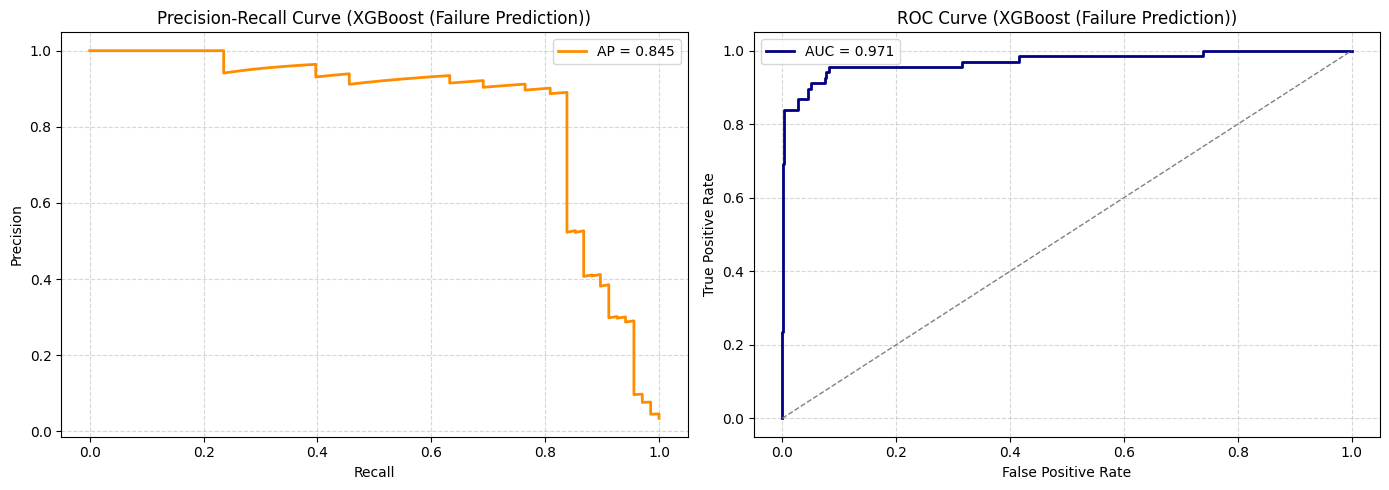

In [21]:
from sklearn.metrics import (
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
    average_precision_score
)

def plot_pr_roc(y_true, y_pred_proba, model_name="XGBoost", figsize=(14, 5)):
    # Compute metrics
    precision, recall, thresholds_pr = precision_recall_curve(y_true, y_pred_proba)
    fpr, tpr, thresholds_roc = roc_curve(y_true, y_pred_proba)
    auc_roc = roc_auc_score(y_true, y_pred_proba)
    auc_pr = average_precision_score(y_true, y_pred_proba)

    # Plot
    fig, axs = plt.subplots(1, 2, figsize=figsize)

    # PR Curve
    axs[0].plot(recall, precision, color='darkorange', lw=2, label=f'AP = {auc_pr:.3f}')
    axs[0].set_xlabel('Recall')
    axs[0].set_ylabel('Precision')
    axs[0].set_title(f'Precision-Recall Curve ({model_name})')
    axs[0].grid(True, linestyle='--', alpha=0.5)
    axs[0].legend(loc='best')

    # ROC Curve
    axs[1].plot(fpr, tpr, color='navy', lw=2, label=f'AUC = {auc_roc:.3f}')
    axs[1].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive Rate')
    axs[1].set_title(f'ROC Curve ({model_name})')
    axs[1].grid(True, linestyle='--', alpha=0.5)
    axs[1].legend(loc='best')

    plt.tight_layout()
    plt.show()


plot_pr_roc(y_test, y_pred_proba, model_name="XGBoost (Failure Prediction)")


In [22]:
# Save the model and preprocessor
xgb_model_path = os.path.join(Base_DIR, 'Models', 'xgb_model.pkl')
os.makedirs(os.path.dirname(xgb_model_path), exist_ok=True)
joblib.dump(xgb_clf, xgb_model_path)
preprocessor_path = os.path.join(Base_DIR, 'Models', 'preprocessor.pkl')
joblib.dump(preprocessor, preprocessor_path)
print()